In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('netflix.csv', sep=",")

In [3]:
data.shape

(363, 6)

In [4]:
data.dtypes

Title       object
Genre       object
Language    object
Premiere    object
Runtime     object
Seasons     object
dtype: object

In [5]:
data.isnull().sum()

Title        2
Genre       37
Language     0
Premiere     2
Runtime      2
Seasons      2
dtype: int64

In [6]:
data.head()

,Title,Genre,Language,Premiere,Runtime,Seasons
0,Stranger Things,Science fiction/horror,English,"July 15, 2016",42–78 min,"3 seasons, 25 episodes"
1,The Crown,Historical drama,English,"November 4, 2016",47–61 min,"4 seasons, 40 episodes"
2,Ozark,Crime drama,English,"July 21, 2017",50–80 min,"4 seasons, 37 episodes"
3,The Umbrella Academy,Superhero action,English,"February 15, 2019",40–60 min,"2 seasons, 20 episodes"
4,Black Summer,Apocalyptic fiction drama,English,"April 11, 2019",21–58 min,"2 seasons, 16 episodes"


In [7]:
total_count = data.shape[0]
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Title. Тип данных object. Количество пустых значений 2, 0.55%.
Колонка Genre. Тип данных object. Количество пустых значений 37, 10.19%.
Колонка Premiere. Тип данных object. Количество пустых значений 2, 0.55%.
Колонка Runtime. Тип данных object. Количество пустых значений 2, 0.55%.
Колонка Seasons. Тип данных object. Количество пустых значений 2, 0.55%.


In [8]:
data = data.loc[data['Premiere'] != "Awaiting release"]
data = data.loc[data['Premiere'] != "TBA"]
data = data.loc[data['Seasons'] != "Awaiting release"]
data = data.loc[data['Seasons'] != "TBA"]
data = data.loc[data['Runtime'] != "Awaiting release"]
data = data.loc[data['Runtime'] != "TBA"]

In [9]:
data.shape

(319, 6)

In [10]:
# Удаление колонок, содержащих пустые значения
data = data.dropna(axis=0, how='any')

In [11]:
data.shape

(286, 6)

In [12]:
def getDate(row):
    dateParts = row.split(" ")
    year = dateParts[2]
    year = year[:4]
    return int(year)

In [13]:
data['Premiere'] = data['Premiere'].apply(getDate)

In [14]:
data.Premiere.unique()

array([2016, 2017, 2019, 2020, 2021, 2022, 2015, 2018])

In [15]:
data.head()

,Title,Genre,Language,Premiere,Runtime,Seasons
0,Stranger Things,Science fiction/horror,English,2016,42–78 min,"3 seasons, 25 episodes"
1,The Crown,Historical drama,English,2016,47–61 min,"4 seasons, 40 episodes"
2,Ozark,Crime drama,English,2017,50–80 min,"4 seasons, 37 episodes"
3,The Umbrella Academy,Superhero action,English,2019,40–60 min,"2 seasons, 20 episodes"
4,Black Summer,Apocalyptic fiction drama,English,2019,21–58 min,"2 seasons, 16 episodes"


In [1]:
for index, genre in enumerate(data.Genre):
    lowerGenre = genre.lower()
    if "horror" in lowerGenre:
        data.Genre[index] = "Horror"
    if "drama" in lowerGenre:
        data.Genre[index] = "Drama"
    if "comedy" in lowerGenre:
        data.Genre[index] = "Comedy"
    if "show" in lowerGenre:
        data.Genre[index] = "Show"
    if "thriller" in lowerGenre:
        data.Genre[index] = "Thriller"
    if "fantasy" in lowerGenre:
        data.Genre[index] = "Fantasy"
    if "crime" in lowerGenre:
        data.Genre[index] = "Crime"
    if "reality" in lowerGenre:
        data.Genre[index] = "Reality"
    if "action" in lowerGenre:
        data.Genre[index] = "Action"
    if "documentary" in lowerGenre:
        data.Genre[index] = "Documentary"
    if "science fiction" in lowerGenre:
        data.Genre[index] = "Science fiction"
    if "dramedy" in lowerGenre:
        data.Genre[index] = "Dramedy"

NameError: name 'data' is not defined

In [17]:
data.Genre.unique()

array(['Science fiction', 'Drama', 'Crime', 'Action', 'Fantasy',
       'Thriller', 'Historical romance', 'Horror', 'Comedy',
       'Comedy-drama', 'Sitcom', 'Reality', 'Crime comedy/Reality show',
       'Mecha/Kaiju', 'Dramedy', 'Documentary', 'Military drama',
       'Survival thriller', 'Crime thriller', 'Supernatural drama',
       'Science fiction thriller', 'Romantic drama',
       'Suspense thriller/Melodrama', 'Fantasy superhero drama',
       'Comedy drama', 'Crime drama', 'Fantasy thriller', 'Teen drama',
       'Show', 'Docuseries', 'Educational', 'True crime',
       'Baking competition', 'Reality competition', 'Dating show',
       'Reality show', 'Travel reality', 'Docu-soap', 'Docu-reality',
       'Makeover reality', 'Talk show', 'Crime comedy/Variety show',
       'Nature docuseries', 'Mystery teen drama',
       'Psychological thriller', 'Martial arts/Action dramedy',
       'Teen mystery thriller anthology', 'Teen mystery thriller',
       'Crime teen drama', 'Afte

In [18]:
def getSeason(row):
    seasonNum = row[0]
    return int(seasonNum)

In [19]:
data['Seasons'] = data['Seasons'].apply(getSeason)

In [20]:
data.Seasons.unique()

array([3, 4, 2, 1, 7, 5, 6])

In [21]:
data.head()

,Title,Genre,Language,Premiere,Runtime,Seasons
0,Stranger Things,Science fiction,English,2016,42–78 min,3
1,The Crown,Drama,English,2016,47–61 min,4
2,Ozark,Crime,English,2017,50–80 min,4
3,The Umbrella Academy,Action,English,2019,40–60 min,2
4,Black Summer,Drama,English,2019,21–58 min,2


In [22]:
def getRuntime(row):
    RuntimeParts = row.split(" ")
    times = RuntimeParts[0].split("–")
    if len(times) == 1:
        return int(times[0])
    resultTime = (int(times[0]) + int(times[1])) / 2
    return resultTime

In [23]:
data['Runtime'] = data['Runtime'].apply(getRuntime)

In [24]:
data['Runtime'].unique()

array([60. , 54. , 65. , 50. , 39.5, 44. , 44.5, 57. , 48. , 51.5, 48.5,
       43.5, 53.5, 64.5, 55. , 45. , 38. , 47.5, 46. , 47. , 52. , 30. ,
       38.5, 27.5, 16.5, 29.5, 29. , 27. , 30.5, 26.5, 31. , 49.5, 35. ,
       24. , 25.5, 32. , 35.5, 12. , 26. , 23.5, 18. , 28.5, 19. , 21. ,
       25. , 17.5, 24.5, 50.5, 23. , 36. , 43. , 34. , 54.5, 37. , 58. ,
       28. , 42.5, 41. , 49. , 41.5, 46.5, 51. , 62. , 61.5, 37.5, 39. ,
       57.5, 40.5, 12.5, 40. , 59. , 20. , 22.5, 53. , 16. , 55.5, 52.5,
       31.5, 62.5, 70. , 32.5, 58.5, 34.5, 42. , 33. , 68.5, 66. , 64. ,
       56.5, 14.5,  4.5, 11.5,  5. , 22. ])

In [25]:
data.dtypes

Title        object
Genre        object
Language     object
Premiere      int64
Runtime     float64
Seasons       int64
dtype: object

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
le_lang = LabelEncoder()
cat_language_le = le_lang.fit_transform(data['Language'])
le_genre = LabelEncoder()
cat_genre_le = le_genre.fit_transform(data['Genre'])
le_title = LabelEncoder()
cat_title_le = le_title.fit_transform(data['Title'])

In [28]:
data.Language = cat_language_le
data.Genre = cat_genre_le
data.Title = cat_title_le
data.head()

,Title,Genre,Language,Premiere,Runtime,Seasons
0,212,39,2,2016,60.0,3
1,230,20,2,2016,54.0,4
2,164,9,2,2017,65.0,4
3,252,0,2,2019,50.0,2
4,22,20,2,2019,39.5,2


In [29]:
data.dtypes

Title         int64
Genre         int64
Language      int64
Premiere      int64
Runtime     float64
Seasons       int64
dtype: object

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['Runtime']])

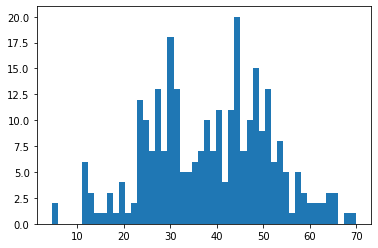

In [32]:
plt.hist(data[['Runtime']],50)
plt.show()

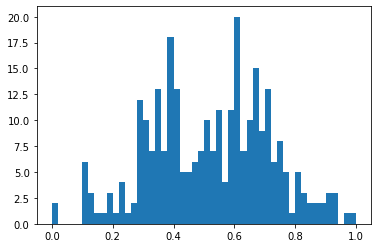

In [33]:
plt.hist(sc1_data,50)
plt.show()